In [35]:
import pandas as pd
import io
#from google.colab import files

import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('opinion_lexicon')
nltk.download('vader_lexicon')
nltk.download('stopwords')

import string

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, roc_auc_score

#from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
#from transformers import InputExample, InputFeatures

import tensorflow as tf



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
import pandas as pd
import io
from google.colab import files

import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')

import string

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, roc_auc_score, average_precision_score 
from sklearn.metrics import auc, roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay


import tensorflow as tf

from matplotlib import pyplot as plt

import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
import numpy as np

In [33]:
!pip install transformers

In [ ]:
#conditions = [
#    (tweets['vader_compound_score']<0),
#    (tweets['vader_compound_score']>0),
#    (tweets['vader_compound_score']==0)]

#values = ['n', 'p', 'u']

#tweets['vader_values'] = np.select(conditions, values)


#tweets.head()

Tweet label  \
0  appymaga mellecon theangelofwrath rantyamycurt...     n   
1  drdanrwilson kstateturk fiski70 runhack provax...     u   
2  really disappointing to see m of analytics cap...     n   
3  mattbc why im desperately hoping we get a publ...     n   
4  the number of people to consider be infected f...     n   

   vader_compound_score vader_values  
0               -0.5994            n  
1                0.0772            p  
2               -0.2006            n  
3                0.0639            p  
4               -0.5859            n

In [ ]:
#tweets.vader_values.value_counts()

p    1700
u     735
n     656
Name: vader_values, dtype: int64

# Preprocessing - Emotion

In [36]:
final_emotion = pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/FALL 2021/GRA/Final results/Emotion Analysis/Emotion Analysis.csv")

In [37]:
final_emotion

Unnamed: 0  ... Emotion Label
0              0  ...           NaN
1              1  ...           NaN
2              2  ...           SAD
3              3  ...         ANGER
4              4  ...           NaN
...          ...  ...           ...
1237        1838  ...         Happy
1238        1839  ...          fear
1239        1840  ...          fear
1240        1841  ...            na
1241        1842  ...            na

[1242 rows x 6 columns]

In [38]:
final_emotion['Emotion Label'].value_counts()

None        371
Happy       121
SAD          47
Sad          39
HAPPY        31
Angry        31
SURPRISE     27
ANGER        21
Surprise     20
FEAR         19
na           16
Fear         16
sad           8
fear          5
surprise      4
none          3
happy         2
Anger         1
ANgry         1
angry         1
Hapy          1
Name: Emotion Label, dtype: int64

In [39]:
len(final_emotion['Emotion Label'])

1242

In [40]:
final_emotion['Emotion Label'].isna().sum()

457

In [41]:
final_emotion['Emotion Label'].fillna("None", inplace = True) 

In [42]:
final_emotion['Emotion Label'].value_counts()

None        828
Happy       121
SAD          47
Sad          39
HAPPY        31
Angry        31
SURPRISE     27
ANGER        21
Surprise     20
FEAR         19
na           16
Fear         16
sad           8
fear          5
surprise      4
none          3
happy         2
Anger         1
ANgry         1
angry         1
Hapy          1
Name: Emotion Label, dtype: int64

In [43]:
final_emotion['Emotion Label'] = final_emotion['Emotion Label'].replace({'na': 'None', 'HAPPY': 'Happy', 'happy': 'Happy', 'ANGER': 'Anger', 'Angry': 'Anger', 'ANgry': 'Anger', 'angry': 'Anger', 'FEAR': 'Fear', 'fear': 'Fear',
                                                                         'SURPRISE': 'Surprise', 'surprise': 'Surprise', 'none': 'None', 'Hapy': 'Happy', 'SAD': 'Sad', 'sad': 'Sad'})

In [44]:
final_emotion['Emotion Label'].value_counts()

None        847
Happy       155
Sad          94
Anger        55
Surprise     51
Fear         40
Name: Emotion Label, dtype: int64

In [45]:
final_emotion['Emotion Label'].isna().sum()

0

In [46]:
final_emotion

Unnamed: 0  ... Emotion Label
0              0  ...          None
1              1  ...          None
2              2  ...           Sad
3              3  ...         Anger
4              4  ...          None
...          ...  ...           ...
1237        1838  ...         Happy
1238        1839  ...          Fear
1239        1840  ...          Fear
1240        1841  ...          None
1241        1842  ...          None

[1242 rows x 6 columns]

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
final_emotion.rename({'Emotion Label': 'final_label'}, axis=1, inplace=True)

In [48]:
final_emotion['final_label'] = final_emotion['final_label'].astype('str')

In [49]:
final_emotion['final_label'] = final_emotion['final_label'].apply(lambda x: x.lower())

In [50]:
final_emotion.final_label.value_counts()

none        847
happy       155
sad          94
anger        55
surprise     51
fear         40
Name: final_label, dtype: int64

In [51]:
final_emotion

Unnamed: 0  ... final_label
0              0  ...        none
1              1  ...        none
2              2  ...         sad
3              3  ...       anger
4              4  ...        none
...          ...  ...         ...
1237        1838  ...       happy
1238        1839  ...        fear
1239        1840  ...        fear
1240        1841  ...        none
1241        1842  ...        none

[1242 rows x 6 columns]

AttributeError: ignored

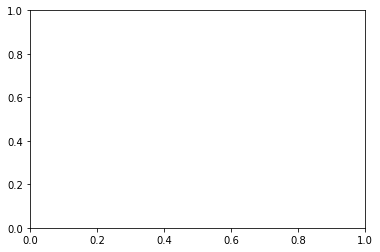

In [27]:
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
#commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

final_emotion['final_label'].value_counts().plot(grid=True, bins=6, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

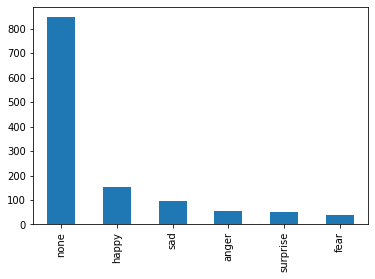

In [28]:
final_emotion['final_label'].value_counts().plot(kind='bar');

In [30]:
import seaborn as sns

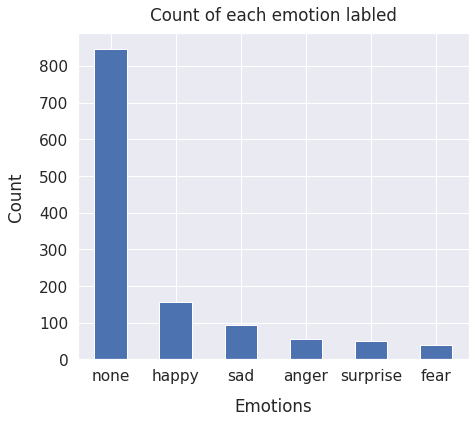

In [31]:
sns.set(font_scale=1.4)
final_emotion['final_label'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Emotions", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of each emotion labled", y=1.02);

# Factorize Target

In [52]:
final_emotion['category_id'] = final_emotion['final_label'].factorize()[0]

In [ ]:
final_emotion.category_id.value_counts()



# 0 : None
# 1 : sad
# 2 : anger
# 3 : happy
# 4 : fear
# 5 : surprise

0    847
3    155
1     94
2     55
5     51
4     40
Name: category_id, dtype: int64

In [53]:
final_emotion.category_id.value_counts()

0    847
3    155
1     94
2     55
5     51
4     40
Name: category_id, dtype: int64

In [ ]:
# 0 : None
# 1 : sad
# 2 : anger
# 3 : happy
# 4 : fear
# 5 : surprise

In [54]:
final_emotion.duplicated(subset=['Tweet'], keep='first').value_counts()

False    1189
True       53
dtype: int64

In [55]:
final_emotion.drop_duplicates(subset=['Tweet'], keep='first', inplace=True, ignore_index=True)

In [56]:
final_emotion.duplicated(subset=['Tweet'], keep='first').value_counts()

False    1189
dtype: int64

In [57]:
final_emotion

Unnamed: 0  ... category_id
0              0  ...           0
1              1  ...           0
2              2  ...           1
3              3  ...           2
4              4  ...           0
...          ...  ...         ...
1184        1838  ...           3
1185        1839  ...           4
1186        1840  ...           4
1187        1841  ...           0
1188        1842  ...           0

[1189 rows x 7 columns]

In [58]:
final_emotion['Tweet'] = final_emotion['Tweet'].astype('str')

In [59]:
# Cleaning [experiment with these choices downstream]
re_tokenizer = RegexpTokenizer("[\\w']+") # Sally's tokenizer
final_emotion['Tweet_tok'] = final_emotion['Tweet'].apply(re_tokenizer.tokenize)

punc = string.punctuation
digits = string.digits 
#stopwords_nltk = nltk.corpus.stopwords.words('english')


final_emotion['Tweet_tok_cleaned'] = final_emotion['Tweet_tok'].apply(lambda x: [word.lower() for word in x])
final_emotion['Tweet_tok_cleaned'] = final_emotion['Tweet_tok_cleaned'].apply(lambda x: [word for word in x if word not in digits]) 
final_emotion['Tweet_tok_cleaned'] = final_emotion['Tweet_tok_cleaned'].apply(lambda x: [word for word in x if word not in punc])
final_emotion['Tweet_cleaned'] = final_emotion['Tweet_tok_cleaned'].apply(lambda x: " ".join(x))

final_emotion['Tweet_cleaned'] = final_emotion['Tweet_cleaned'].apply(lambda x: re.sub(r'\d+', '',x))
#final_sentiment['num_words'] = final_sentiment['Tweet_cleaned'].apply(lambda x: len(x.split()))

final_emotion = final_emotion.drop(columns=['Tweet_tok','Tweet_tok_cleaned'])
final_emotion.head()

Unnamed: 0  ...                                      Tweet_cleaned
0           0  ...  appymaga mellecon theangelofwrath rantyamycurt...
1           1  ...  drdanrwilson kstateturk fiski runhack provaxte...
2           2  ...  really disappointing to see m of analytics cap...
3           3  ...  mattbc why im desperately hoping we get a publ...
4           4  ...  the number of people to consider be infected f...

[5 rows x 8 columns]

In [60]:
# Set up training and test sets
# 80%; 20%
# Stratify on Genre

train, test = train_test_split(final_emotion[['Tweet_cleaned','category_id']], 
                               test_size = 0.2,
                               random_state = 42,
                               stratify = final_emotion['category_id']) # Stratify ensures equal distribution of 0/1 in training and test sets 

In [ ]:
#train, test = train_test_split(final_sentiment, test_size=0.2, random_state=42)

# BERT

In [61]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from transformers import InputExample, InputFeatures
#from sentence_transformers import SentenceTransformer

In [62]:
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=6)
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [63]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  test_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, test_InputExamples

In [64]:
# Assign column identifiers
DATA_COLUMN = 'Tweet_cleaned'
LABEL_COLUMN = 'category_id'

In [65]:
# Produce InputExample objects
train_InputExamples, test_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

In [66]:
# Run the next function
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=300):
    features = [] 

    for e in examples:
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, 
            truncation=True)

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label))

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),),)


In [67]:
# Call the function above on training and test InputExample objects
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

test_data = convert_examples_to_tf_dataset(list(test_InputExamples), tokenizer)
test_data = test_data.batch(32)

# Ignore FutureWarnings or tweak code to resolve

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [68]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', patience=5,restore_best_weights=True, verbose=1)

In [70]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

history = model.fit(train_data, epochs=4, validation_data=test_data, callbacks=[es])

Epoch 1/4
60/60 [==============================] - 50s 644ms/step - loss: 1.2511 - accuracy: 0.6320 - val_loss: 1.0899 - val_accuracy: 0.6807
Epoch 2/4
60/60 [==============================] - 36s 607ms/step - loss: 1.0212 - accuracy: 0.6830 - val_loss: 1.1154 - val_accuracy: 0.6807
Epoch 3/4
60/60 [==============================] - 36s 607ms/step - loss: 0.7161 - accuracy: 0.7723 - val_loss: 1.3364 - val_accuracy: 0.6639
Epoch 4/4
60/60 [==============================] - 36s 607ms/step - loss: 0.4711 - accuracy: 0.8412 - val_loss: 1.5310 - val_accuracy: 0.6513


In [ ]:
test.category_id.value_counts()

0    162
3     29
1     19
5     10
2     10
4      8
Name: category_id, dtype: int64

In [71]:
X_test_strings = test['Tweet_cleaned'].tolist()

In [74]:
# Use the model to predict whether the genre is Country for the test set
tf_batch = tokenizer(X_test_strings, max_length=200, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)

Y_pred_bert = tf.argmax(tf_predictions, axis=1)
Y_pred_bert = Y_pred_bert.numpy()
Y_pred_bert

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0])

In [72]:
Y_test = test['category_id'].to_numpy()
Y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 3, 3, 0, 0, 0, 5, 0, 0, 1, 0, 2, 0, 3, 0, 3, 3, 0, 0,
       0, 2, 5, 1, 0, 3, 0, 0, 0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 3, 0, 5, 5,
       0, 0, 1, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 5, 0, 0, 0, 3, 0, 0, 3, 0,
       2, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 4, 0, 0, 2, 2, 0, 0, 1, 0, 4, 0, 0, 0, 0, 1, 0, 5, 0,
       0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 2, 0, 0, 4, 3, 0, 0, 0, 0,
       5, 0, 0, 1, 0, 3, 3, 0, 0, 3, 4, 0, 0, 3, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 3, 1, 4, 0, 4, 0, 0, 3, 1, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 5, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0])

In [87]:
# Add to performance_metrics dataframe
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'MCC']

performance_metrics = pd.DataFrame([precision_score(Y_test, Y_pred_bert,average='macro'), 
                                    recall_score(Y_test, Y_pred_bert,average='macro'),
                                    accuracy_score(Y_test, Y_pred_bert),
                                    f1_score(Y_test, Y_pred_bert,average='macro'),
                                    matthews_corrcoef(Y_test, Y_pred_bert)], index=index)

performance_metrics.columns = ['BERT']

performance_metrics.iloc[[2]] = 0.6807

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
performance_metrics

BERT
Precision  0.171773
Recall     0.176645
Accuracy   0.680700
F1 score   0.162203
MCC        0.044686

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


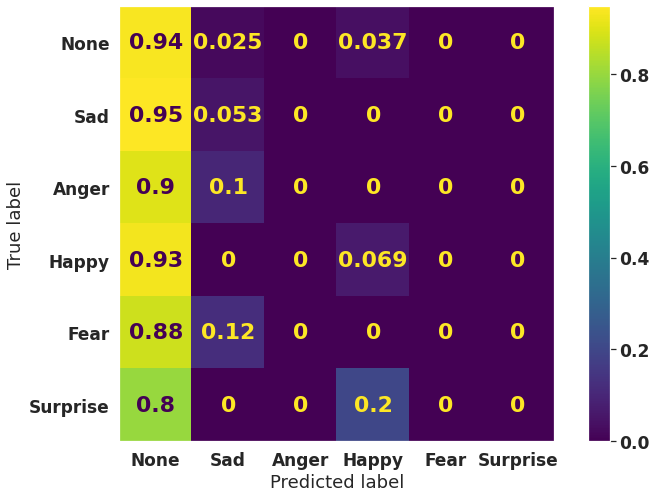

In [92]:
# 0 : None
# 1 : sad
# 2 : anger
# 3 : happy
# 4 : fear
# 5 : surprise
fig, ax = plt.subplots(figsize=(12, 8));

font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)

cm_norm = confusion_matrix(Y_test, Y_pred_bert, normalize="true")
cm_display_norm = ConfusionMatrixDisplay(cm_norm, display_labels=['None', 'Sad', 'Anger', 'Happy', 'Fear', 'Surprise'])

cm_display_norm.plot(ax=ax);

plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  

axes = plt.gca()

axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
plt.grid(False)

# xxxxxxxxxxxxxxxxxxxxxxxxx ------End of BERT Model Here -------------------xxx

In [ ]:
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'AU ROC score', 'AU PRC score', 'MCC']
performance_metrics = pd.DataFrame([precision_score(Y_test, Y_pred_svm), 
                                    recall_score(Y_test, Y_pred_svm),
                                    accuracy_score(Y_test, Y_pred_svm),
                                    f1_score(Y_test, Y_pred_svm),
                                    roc_auc_score(Y_test, Y_pred_svm),
                                    average_precision_score(Y_test, Y_pred_svm),
                                    matthews_corrcoef(Y_test, Y_pred_svm)], index)

performance_metrics.columns = ['SVM']

performance_metrics

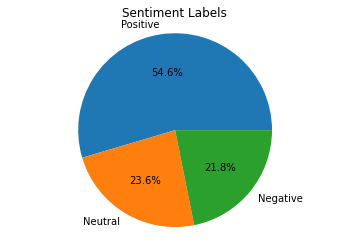

In [ ]:
import matplotlib.pyplot as plt

Tasks = [1617,698,647]

my_labels = 'Positive','Neutral','Negative'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Sentiment Labels')
plt.axis('equal')
plt.show()

In [ ]:
# Cool looking bar plot here

In [ ]:
tweets

Tweet label  \
0     appymaga mellecon theangelofwrath rantyamycurt...     n   
1     drdanrwilson kstateturk fiski70 runhack provax...     u   
2     really disappointing to see m of analytics cap...     n   
3     mattbc why im desperately hoping we get a publ...     n   
4     the number of people to consider be infected f...     n   
...                                                 ...   ...   
2957  the drones are a potential risk to an organiza...     n   
2958  nor is microsoft team azure or any of the othe...     u   
2959  the latest update for tigera includes deployin...     u   
2960  cheap or free cybersecurity training resources...     u   
2961  microsoft patched vulnerability on ms teams wh...     u   

      vader_compound_score vader_values  category_id  
0                  -0.5994            n            0  
1                   0.0772            p            1  
2                  -0.2006            n            0  
3                   0.0639            p            1  
4                  -0.5859            n            0  
...                    ...          ...          ...  
2957                0.3612            p            1  
2958               -0.0258            n            0  
2959                0.0000            u            2  
2960                0.5106            p            1  
2961               -0.4939            n            0  

[2962 rows x 5 columns]

# Word Cloud Here

In [ ]:
positive = tweets[tweets.vader_values == 'p']
negative = tweets[tweets.vader_values == 'n']

In [ ]:
positive

Tweet  ...                                        tweet_clean
1     drdanrwilson kstateturk fiski70 runhack provax...  ...  drdanrwilson kstateturk fiski70 runhack provax...
3     mattbc why im desperately hoping we get a publ...  ...  mattbc im desperately hoping get public option...
5     jamie_shaw myfitnesspal myfitnesspal hydratemf...  ...  jamie_shaw myfitnesspal myfitnesspal hydratemf...
8     th game finished of donkey kong land dkl is ba...  ...  th game finished donkey kong land dkl basicall...
9     fighterofevil fitbitsupport myfitnesspal myfit...  ...  fighterofevil fitbitsupport myfitnesspal myfit...
...                                                 ...  ...                                                ...
2953                         cyber security analyst soc  ...                         cyber security analyst soc
2954  austtechcomp is hosting their program online u...  ...  austtechcomp hosting program online covid19 pa...
2955  cyberwarfare can destabilize a nation disrupt ...  ...  cyberwarfare destabilize nation disrupt commer...
2957  the drones are a potential risk to an organiza...  ...  drone potential risk organization information ...
2960  cheap or free cybersecurity training resources...  ...  cheap free cybersecurity training resource via...

[1617 rows x 8 columns]

In [ ]:
negative

Tweet  ...                                        tweet_clean
0     appymaga mellecon theangelofwrath rantyamycurt...  ...  appymaga mellecon theangelofwrath rantyamycurt...
2     really disappointing to see m of analytics cap...  ...  really disappointing see analytics capacity sp...
4     the number of people to consider be infected f...  ...  number people consider infected every confirme...
6     chadmillsai i for one believe algorithms have ...  ...  chadmillsai one believe algorithm totally scre...
7     hillarygache not over health health comes firs...  ...  hillarygache not health health come first heal...
...                                                 ...  ...                                                ...
2944  ai in fraud detection holds potential to locat...  ...  ai fraud detection hold potential locate perpe...
2945  no final do ms passado uma equipe de investiga...  ...  no final m passado uma equipe de investigadore...
2956  ransomware groups continue to target healthcar...  ...  ransomware group continue target healthcare cr...
2958  nor is microsoft team azure or any of the othe...  ...  nor microsoft team azure others cybersecurity ...
2961  microsoft patched vulnerability on ms teams wh...  ...  microsoft patched vulnerability m team could a...

[647 rows x 8 columns]

In [ ]:
from itertools import chain
import collections
from collections import Counter

In [ ]:
p_list = positive['stopwords_removed'].tolist() 
n_list = negative['stopwords_removed'].tolist() 


p_list = list(chain(*p_list))
n_list = list(chain(*n_list))



p = collections.Counter(p_list)
n = collections.Counter(n_list)


In [ ]:
p.most_common(200)

[('health', 489),
 ('patient', 326),
 ('http', 309),
 ('amp', 257),
 ('care', 226),
 ('virtual', 157),
 ('more', 149),
 ('like', 134),
 ('not', 133),
 ('help', 131),
 ('data', 129),
 ('technology', 123),
 ('u', 121),
 ('monitoring', 111),
 ('out', 109),
 ('time', 104),
 ('healthcare', 103),
 ('need', 99),
 ('telehealth', 92),
 ('information', 91),
 ('app', 88),
 ('medical', 88),
 ('support', 87),
 ('get', 85),
 ('service', 83),
 ('people', 81),
 ('mental', 80),
 ('new', 78),
 ('online', 77),
 ('one', 75),
 ('system', 75),
 ('im', 74),
 ('telemedicine', 74),
 ('community', 71),
 ('good', 70),
 ('work', 67),
 ('’', 67),
 ('day', 64),
 ('mobile', 63),
 ('free', 61),
 ('dont', 61),
 ('algorithm', 61),
 ('covid19', 60),
 ('intelligence', 59),
 ('way', 59),
 ('make', 59),
 ('some', 57),
 ('take', 57),
 ('remote', 57),
 ('know', 56),
 ('diagnostic', 56),
 ('via', 55),
 ('use', 55),
 ('Health', 54),
 ('portal', 53),
 ('surveillance', 52),
 ('best', 52),
 ('well', 52),
 ('would', 51),
 ('home',

In [ ]:
positive_stopwords = ['health','patient', 'http', 'amp', 'virtual', 'more', 'telehealth', 'patient', 'im', "’'", 'ai', 'know', 
                     'see', 'one', 'home', 'via', 'could', 'take', 'IoMT', 'go', 'make', 'Things', 'stay', 'art', 'stay',
                     "'s", 'also', 'day', 'thing', '``', "''", 'talk', 'u', 'no', 'may', 'youre', 'team', 'much', 'gt',
                      '...', 'use', 'way', 'no', 'year', 'may', 'IoMT', 'go', 'got', 'pm' , 'co']

In [ ]:
n.most_common(200)

[('health', 163),
 ('not', 122),
 ('patient', 122),
 ('no', 77),
 ('amp', 75),
 ('people', 59),
 ('need', 54),
 ('one', 49),
 ('http', 48),
 ('dont', 47),
 ('more', 44),
 ('time', 44),
 ('monitoring', 43),
 ('get', 42),
 ('surveillance', 41),
 ('mental', 41),
 ('prevention', 41),
 ('see', 38),
 ('case', 38),
 ('know', 38),
 ('out', 36),
 ('like', 36),
 ('year', 36),
 ('algorithm', 35),
 ('hit', 34),
 ('medical', 34),
 ('coronavirus', 34),
 ('u', 34),
 ('epidemiological', 33),
 ('public', 33),
 ('data', 33),
 ('covid19', 33),
 ('im', 33),
 ('technology', 33),
 ('’', 32),
 ('go', 31),
 ('many', 31),
 ('would', 30),
 ('work', 30),
 ('hospital', 30),
 ('make', 30),
 ('diagnostic', 30),
 ('every', 29),
 ('day', 28),
 ('even', 28),
 ('test', 28),
 ('via', 28),
 ('care', 27),
 ('come', 27),
 ('risk', 27),
 ('mobile', 26),
 ('some', 26),
 ('going', 25),
 ('real', 25),
 ('detection', 25),
 ('cancer', 24),
 ('new', 24),
 ('want', 24),
 ('much', 24),
 ('social', 24),
 ('problem', 23),
 ('flow', 2

In [ ]:
negative_stopwords = ['health', 'http','https', 'amp', 'virtual', 'more', 'telehealth', 'patient', 'patient', 'im', "’'", 'ai',
                      'know', 'see', 'one', 'home', 'via', 'could', 'take', 'IoMT', 'go', 'make', 'Things', 'stay', 'art', 'stay',
                      "'s", 'also', 'day', 'thing', '``', "''", 'talk', 'u', 'no', 'may', 'youre', 'team', 'much', 'gt',
                      '...',"’", "us", "would", "telemedicine", 'one', 'go', 'via', 'new', 'want', 'see', 'get', 'ill', 
                      'say', 'flu', 'tell', 'lot', 'de', 'may', 'fact', 'others', 'la', 'said', 'cost', 'youre', "''", 'thats', 'co']

In [ ]:
positive['stopwords_removed'] = positive['stopwords_removed'].apply(lambda y: [item for item in y if item.lower() not in positive_stopwords])
negative['stopwords_removed'] = negative['stopwords_removed'].apply(lambda y: [item for item in y if item.lower() not in negative_stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
positive['tweet_clean'] = [' '.join(map(str, l)) for l in positive['stopwords_removed']]
negative['tweet_clean'] = [' '.join(map(str, l)) for l in negative['stopwords_removed']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#positive_str = positive.tweet_clean.to_list()
positive_text1 = " ".join(review for review in positive.tweet_clean.astype(str))
negative_text1 = " ".join(review for review in negative.tweet_clean.astype(str))

In [ ]:
positive_text1 

"drdanrwilson kstateturk fiski70 runhack provaxtexan mstrixter troydee veritasever plasticdoe smcwoof jamesdieckhoff katlarue7 lithiumca jkellyca rocza handmadekathy laughlandmorgan andrewlazarus4 kevinault grumfromnorwich crabb_vicki shonadmcdermott retire_young_38 takethatdoctors jdsro159 flitesurgn michaelmina_lab mcfunny awithonelison doritmi margie_moo nocoochi mc40_e christydubbs krochetxkorner carlsmythe terryexsci roguetrader84 mmelgar09 parentmindinc marikatt77 qtent2016 heartistsince11 julieamclean green_cait skeptmgmt californiaatto2 tinfoilawards liamkav whoweareuk oh honey collect evidence done want disprove evidence need gather however mine came head epidemiological surveillance department public center ministry ukraine mattbc desperately hoping get public option passed session ct not bear terrible coverage option interferes ability hire unfortunately small ee plan not attractive customer jamie_shaw myfitnesspal myfitnesspal hydratemfp mfpdoesntsyncwater get added please 

In [ ]:
from wordcloud import WordCloud

<function matplotlib.pyplot.show>

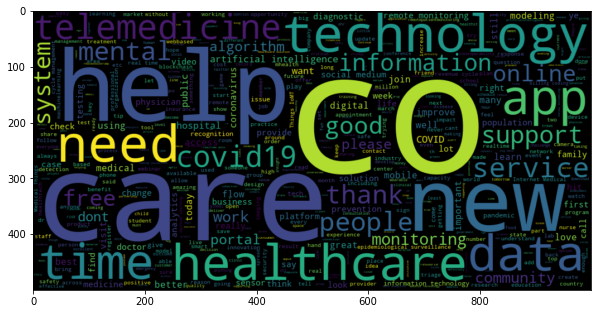

In [ ]:
plt.figure(figsize=(10,10))
#positive_text=positive_text1
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text1)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

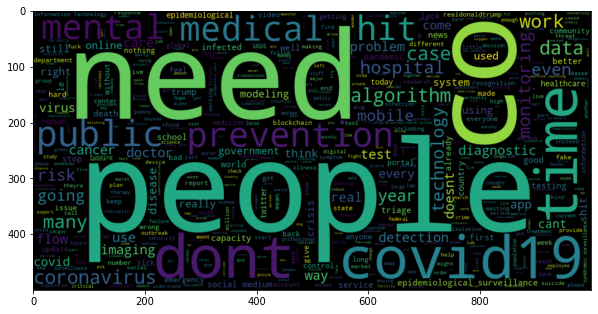

In [ ]:
plt.figure(figsize=(10,10))
#negative_text=negative_text
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(negative_text1)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

In [ ]:
positive_text1 = positive_text1.split()

In [ ]:
negative_text1 = negative_text1.split()

In [ ]:
negative_text1

['appymaga',
 'mellecon',
 'theangelofwrath',
 'rantyamycurtis',
 'rm1evo',
 'misterantibully',
 'death',
 'rate',
 'not',
 'valid',
 'people',
 'intensive',
 'care',
 'require',
 'intensive',
 'care',
 'million',
 'people',
 'max',
 'capacity',
 'hospitalization',
 'million',
 'bed',
 'range',
 'le',
 'million',
 'season',
 'typically',
 'really',
 'disappointing',
 'analytics',
 'capacity',
 'spent',
 'outside',
 'nh',
 'most',
 'nh',
 'analyst',
 'capability',
 'desire',
 'population',
 'work',
 'datasaveslives',
 'apha_analysts',
 'healthfdn',
 'nuffieldtrust',
 'number',
 'people',
 'consider',
 'infected',
 'every',
 'confirmed',
 'case',
 'apparently',
 'suspected',
 'case',
 'reported',
 'immediately',
 'epidemiological',
 'surveillance',
 'control',
 'infectiousdisease',
 'ncoronavirus',
 'chadmillsai',
 'believe',
 'algorithm',
 'totally',
 'screwed',
 'stock',
 'market',
 'dont',
 'dont',
 'inner',
 'working',
 'well',
 'hillarygache',
 'not',
 'come',
 'first',
 'problem',


In [ ]:


#p_list = list(chain(*positive_text1))
#n_list = list(chain(*n_list))



p = collections.Counter(positive_text1)
n = collections.Counter(negative_text1)

In [ ]:
n.most_common(200)

[('not', 122),
 ('people', 59),
 ('need', 54),
 ('dont', 47),
 ('time', 44),
 ('monitoring', 43),
 ('surveillance', 41),
 ('mental', 41),
 ('prevention', 41),
 ('case', 38),
 ('out', 36),
 ('like', 36),
 ('year', 36),
 ('algorithm', 35),
 ('hit', 34),
 ('medical', 34),
 ('coronavirus', 34),
 ('epidemiological', 33),
 ('public', 33),
 ('data', 33),
 ('covid19', 33),
 ('technology', 33),
 ('many', 31),
 ('work', 30),
 ('hospital', 30),
 ('diagnostic', 30),
 ('every', 29),
 ('even', 28),
 ('test', 28),
 ('care', 27),
 ('come', 27),
 ('risk', 27),
 ('mobile', 26),
 ('some', 26),
 ('going', 25),
 ('real', 25),
 ('detection', 25),
 ('cancer', 24),
 ('social', 24),
 ('problem', 23),
 ('flow', 23),
 ('way', 23),
 ('use', 23),
 ('doctor', 23),
 ('doesnt', 23),
 ('imaging', 23),
 ('system', 21),
 ('virus', 21),
 ('death', 20),
 ('app', 20),
 ('cant', 20),
 ('information', 20),
 ('modeling', 20),
 ('disease', 19),
 ('think', 19),
 ('issue', 18),
 ('using', 18),
 ('right', 18),
 ('crisis', 18),
 (

<function matplotlib.pyplot.show>

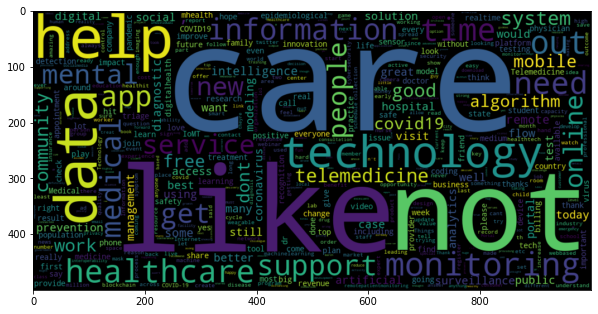

In [ ]:
plt.figure(figsize=(10,10))
#negative_text=negative_text
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate_from_frequencies(p)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

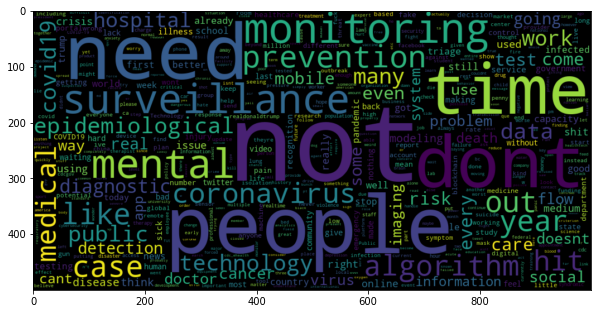

In [ ]:
plt.figure(figsize=(10,10))
#negative_text=negative_text
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate_from_frequencies(n)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

# Text Preprocessing

In [ ]:
final_sentiment['tokenized_tweet'] = final_sentiment.apply(lambda row: nltk.word_tokenize(str(row['Tweet'])), axis=1)

<ipython-input-45-b31886a03b63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_sentiment['tokenized_tweet'] = final_sentiment.apply(lambda row: nltk.word_tokenize(str(row['Tweet'])), axis=1)


In [ ]:
final_sentiment

Unnamed: 0                                              Tweet label  \
0              0  appymaga mellecon theangelofwrath rantyamycurt...     n   
1              1  drdanrwilson kstateturk fiski70 runhack provax...     u   
2              2  really disappointing to see m of analytics cap...     n   
3              3  mattbc why im desperately hoping we get a publ...     n   
4              4  the number of people to consider be infected f...     n   
...          ...                                                ...   ...   
2951        3086  the drones are a potential risk to an organiza...     n   
2952        3087  nor is microsoft team azure or any of the othe...     u   
2953        3088  the latest update for tigera includes deployin...     u   
2954        3089  cheap or free cybersecurity training resources...     u   
2955        3090  microsoft patched vulnerability on ms teams wh...     u   

      vader_compound_score final_label  category_id  \
0                  -0.5994           n            0   
1                   0.0772           u            1   
2                  -0.2006           n            0   
3                   0.0639           n            0   
4                  -0.5859           n            0   
...                    ...         ...          ...   
2951                0.3612           n            0   
2952               -0.0258           u            1   
2953                0.0000           u            1   
2954                0.5106           u            1   
2955               -0.4939           n            0   

                                        tokenized_tweet  
0     [appymaga, mellecon, theangelofwrath, rantyamy...  
1     [drdanrwilson, kstateturk, fiski70, runhack, p...  
2     [really, disappointing, to, see, m, of, analyt...  
3     [mattbc, why, im, desperately, hoping, we, get...  
4     [the, number, of, people, to, consider, be, in...  
...                                                 ...  
2951  [the, drones, are, a, potential, risk, to, an,...  
2952  [nor, is, microsoft, team, azure, or, any, of,...  
2953  [the, latest, update, for, tigera, includes, d...  
2954  [cheap, or, free, cybersecurity, training, res...  
2955  [microsoft, patched, vulnerability, on, ms, te...  

[2956 rows x 7 columns]

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
remove_words = {'against', 'out', 'more', 'most', 'some', 'no', 'not', 'nor', "don't", "aren't", "didn't", "doesn't", "hadn't", "hasn't",
           "haven't", "isn't", "mightn't", "mustn't", "needn't", "shan't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't"}

In [ ]:
stop -= remove_words

In [ ]:
final_sentiment['stopwords_removed'] = final_sentiment['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])

<ipython-input-52-738d4ece225a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_sentiment['stopwords_removed'] = final_sentiment['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])


In [ ]:
import string 
punc = string.punctuation + '--' # Add characters as necessary 
final_sentiment['stopwords_removed'] = final_sentiment['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])

digits = string.digits 
final_sentiment['stopwords_removed'] = final_sentiment['stopwords_removed'].apply(lambda x: [word for word in x if word not in digits])


<ipython-input-53-37a7b09e9361>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_sentiment['stopwords_removed'] = final_sentiment['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])
<ipython-input-53-37a7b09e9361>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_sentiment['stopwords_removed'] = final_sentiment['stopwords_removed'].apply(lambda x: [word for word in x if word not in digits])


In [ ]:
final_sentiment

Unnamed: 0                                              Tweet label  \
0              0  appymaga mellecon theangelofwrath rantyamycurt...     n   
1              1  drdanrwilson kstateturk fiski70 runhack provax...     u   
2              2  really disappointing to see m of analytics cap...     n   
3              3  mattbc why im desperately hoping we get a publ...     n   
4              4  the number of people to consider be infected f...     n   
...          ...                                                ...   ...   
2951        3086  the drones are a potential risk to an organiza...     n   
2952        3087  nor is microsoft team azure or any of the othe...     u   
2953        3088  the latest update for tigera includes deployin...     u   
2954        3089  cheap or free cybersecurity training resources...     u   
2955        3090  microsoft patched vulnerability on ms teams wh...     u   

      vader_compound_score final_label  category_id  \
0                  -0.5994           n            0   
1                   0.0772           u            1   
2                  -0.2006           n            0   
3                   0.0639           n            0   
4                  -0.5859           n            0   
...                    ...         ...          ...   
2951                0.3612           n            0   
2952               -0.0258           u            1   
2953                0.0000           u            1   
2954                0.5106           u            1   
2955               -0.4939           n            0   

                                        tokenized_tweet  \
0     [appymaga, mellecon, theangelofwrath, rantyamy...   
1     [drdanrwilson, kstateturk, fiski70, runhack, p...   
2     [really, disappointing, to, see, m, of, analyt...   
3     [mattbc, why, im, desperately, hoping, we, get...   
4     [the, number, of, people, to, consider, be, in...   
...                                                 ...   
2951  [the, drones, are, a, potential, risk, to, an,...   
2952  [nor, is, microsoft, team, azure, or, any, of,...   
2953  [the, latest, update, for, tigera, includes, d...   
2954  [cheap, or, free, cybersecurity, training, res...   
2955  [microsoft, patched, vulnerability, on, ms, te...   

                                      stopwords_removed  
0     [appymaga, mellecon, theangelofwrath, rantyamy...  
1     [drdanrwilson, kstateturk, fiski70, runhack, p...  
2     [really, disappointing, see, analytics, capaci...  
3     [mattbc, im, desperately, hoping, get, public,...  
4     [number, people, consider, infected, every, co...  
...                                                 ...  
2951  [drones, potential, risk, organizations, infor...  
2952  [nor, microsoft, team, azure, others, cybersec...  
2953  [latest, update, tigera, includes, deploying, ...  
2954  [cheap, free, cybersecurity, training, resourc...  
2955  [microsoft, patched, vulnerability, ms, teams,...  

[2956 rows x 8 columns]

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HardThakkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
final_sentiment['stopwords_removed'] = final_sentiment['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

<ipython-input-55-049d2789c530>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_sentiment['stopwords_removed'] = final_sentiment['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [ ]:
final_sentiment['tweet_clean'] = [' '.join(map(str, l)) for l in final_sentiment['stopwords_removed']]

<ipython-input-56-e885e3b62bb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_sentiment['tweet_clean'] = [' '.join(map(str, l)) for l in final_sentiment['stopwords_removed']]


In [ ]:
final_sentiment.category_id.dtypes

dtype('int64')

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(final_sentiment.tweet_clean).toarray()

labels = final_sentiment.category_id

print("Each of the %d tweets is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 2956 tweets is represented by 2009 features (TF-IDF score of unigrams and bigrams)


In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
category_id_df = final_sentiment[['label', 'category_id']].drop_duplicates()

category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)

In [ ]:
N = 3
for label, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(label))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> n:
  * Most Correlated Unigrams are: sensor, interoperability, live
  * Most Correlated Bigrams are: apple health, artificial intelligence, 19 http

==> p:
  * Most Correlated Unigrams are: sensor, interoperability, live
  * Most Correlated Bigrams are: apple health, artificial intelligence, 19 http

==> u:
  * Most Correlated Unigrams are: flu, risk, shit
  * Most Correlated Bigrams are: health issue, artificial intelligence, public health


In [ ]:
# Cleaning [experiment with these choices downstream]
re_tokenizer = RegexpTokenizer("[\\w']+") # Sally's tokenizer
final_emotion['Tweet_tok'] = final_emotion['Tweet'].apply(re_tokenizer.tokenize)

punc = string.punctuation
digits = string.digits 


stopwords_nltk = nltk.corpus.stopwords.words('english')

final_emotion['Tweet_tok_cleaned'] = final_emotion['Tweet_tok'].apply(lambda x: [word.lower() for word in x])
final_emotion['Tweet_tok_cleaned'] = final_emotion['Tweet_tok_cleaned'].apply(lambda x: [word for word in x if word not in digits]) 
final_emotion['Tweet_tok_cleaned'] = final_emotion['Tweet_tok_cleaned'].apply(lambda x: [word for word in x if word not in punc])
final_emotion['Tweet_tok_cleaned'] = final_emotion['Tweet_tok_cleaned'].apply(lambda x: [word for word in x if word not in stopwords_nltk])
final_emotion['Tweet_cleaned'] = final_emotion['Tweet_tok_cleaned'].apply(lambda x: " ".join(x))


In [ ]:
final_emotion['Tweet_cleaned'] = final_emotion['Tweet_cleaned'].astype('str')

In [ ]:
final_emotion.category_id.value_counts()

0    811
3    145
1     93
2     52
5     48
4     40
Name: category_id, dtype: int64

In [ ]:
X = final_emotion['Tweet_cleaned'] # Collection of documents
y = final_emotion['category_id']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(final_emotion['Tweet_cleaned'], 
                                                    final_emotion['category_id'],
                                                    test_size = 0.2,
                                                    stratify = final_emotion['category_id']) 
                                                    # Stratify ensures equal distribution of 
                                                    # Paris and HongKong in training and test sets

In [ ]:
X_train

518     data detection malicious documents gmail impre...
281     japans entire school system closed spring brea...
329     saugarmaripuri eastmanov1 davita multiple cont...
515     american health packaging issues voluntary nat...
278     featured app johnny cage nut punch depletes he...
                              ...                        
1133    qlik microsoft created na roadshow modernize d...
1021    lets take look virtual reality changing medica...
1119    cool vr work mzackoff even cool stuff come ped...
736             day without carb feel like hit brick wall
1077    ecare21virtualcareplatform digital population ...
Name: Tweet_cleaned, Length: 951, dtype: object

In [ ]:
vectorizer = TfidfVectorizer() 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
X_train_tfidf.shape

(951, 6576)

In [ ]:
Y_train.shape

(951,)

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
#import warnings

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_model.fit(X_train_tfidf, Y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)

In [ ]:
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(Y_test, y_pred_rf)) # y_true, y_pred

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       162
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10

    accuracy                           0.68       238
   macro avg       0.11      0.17      0.14       238
weighted avg       0.46      0.68      0.55       238



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'MCC']
rf_perf = pd.DataFrame([precision_score(Y_test, y_pred_rf), 
                                    recall_score(Y_test, y_pred_rf),
                                    accuracy_score(Y_test, y_pred_rf),
                                    f1_score(Y_test, y_pred_rf),
                                    roc_auc_score(Y_test, y_pred_rf),
                                    average_precision_score(Y_test, y_pred_rf),
                                    matthews_corrcoef(Y_test, y_pred_rf)], index=index)

performance_metrics['Random Forest'] = pd.Series(rf_perf[0])
performance_metrics



```
# This is formatted as code
```

# Logistic Regression

In [ ]:
train, test = train_test_split(tweets, test_size=0.1, random_state=42, stratify = tweets['category_id'])

In [ ]:
print(len(train))
print(len(test))

2665
297


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(#min_df = 5,
                             #max_df = 0.7,
                             sublinear_tf = True,
                             #ngram_range=(1,3),
                             use_idf = True)
train_matrix = vectorizer.fit_transform(train['tweet_clean'])
test_matrix = vectorizer.transform(test['tweet_clean'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['category_id']
y_test = test['category_id']

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
predictions

array([1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
np.array(np.unique(predictions, return_counts=True)).T

array([[  0,  23],
       [  1, 239],
       [  2,  35]])

In [ ]:
# Negative = 0
# Positive = 1
# Neutral = 2

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
#new = np.asarray(df1['Manual_Sentiment']) #y_test
confusion_matrix(y_test, predictions) #y_true, y_pred

array([[ 19,  44,   2],
       [  3, 154,   5],
       [  1,  41,  28]])

In [ ]:
print(classification_report(y_test, predictions)) # y_true, y_pred

              precision    recall  f1-score   support

           0       0.83      0.29      0.43        65
           1       0.64      0.95      0.77       162
           2       0.80      0.40      0.53        70

    accuracy                           0.68       297
   macro avg       0.76      0.55      0.58       297
weighted avg       0.72      0.68      0.64       297



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

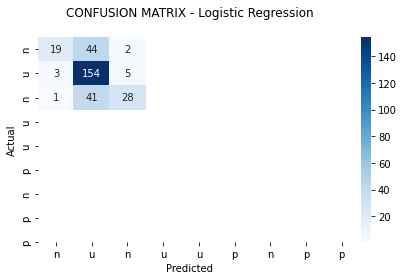

In [ ]:
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.label.values, 
            yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Logistic Regression\n")
plt.tight_layout()
plt.show();

# Random Forest

In [ ]:
model_2 = RandomForestClassifier()

In [ ]:
model_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model_2.predict(X_test)

In [ ]:
y_pred

array([1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
np.array(np.unique(y_pred, return_counts=True)).T
# Negative = 0
# Positive = 1
# Neutral = 2

array([[  0,  23],
       [  1, 201],
       [  2,  73]])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#new = np.asarray(df1['Manual_Sentiment']) #y_test
confusion_matrix(y_test, predictions) #y_true, y_pred

array([[ 19,  44,   2],
       [  3, 154,   5],
       [  1,  41,  28]])

In [ ]:
print(classification_report(y_test, predictions)) # y_true, y_pred

              precision    recall  f1-score   support

           0       0.83      0.29      0.43        65
           1       0.64      0.95      0.77       162
           2       0.80      0.40      0.53        70

    accuracy                           0.68       297
   macro avg       0.76      0.55      0.58       297
weighted avg       0.72      0.68      0.64       297



# SVM

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(final_sentiment['tweet_clean'], 
                                                    final_sentiment['category_id'],
                                                    test_size = 0.2,
                                                    stratify = final_sentiment['category_id']) # Stratify ensures equal distribution of 0/1 in training and test sets  

In [ ]:
X_train

667     forgot mention labour greatest achievement cen...
372                       rush limbaugh health update app
2001    ive heard long time friend health professional...
99      thank well done chex_org hosting fantastic eve...
851                                                  name
                              ...                        
2149    cryptocurrencies money investing investmentstr...
2535    oksalayomxm heard around world male commiting ...
1440    Some idea worked discus potential intersection...
310     fce365 pwn20wnd anyones health app not working...
957     last decade became vital healthcare provider i...
Name: tweet_clean, Length: 2364, dtype: object

In [ ]:
Y_train

667     2
372     1
2001    2
99      2
851     1
       ..
2149    2
2535    2
1440    2
310     1
957     2
Name: category_id, Length: 2364, dtype: int64

In [ ]:
# Create TF-IDF vectors
vectorizer = TfidfVectorizer() 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
X_train_tfidf

<2364x12387 sparse matrix of type '<class 'numpy.float64'>'
	with 41414 stored elements in Compressed Sparse Row format>

In [ ]:
# Train the SVM model
svm_model = LinearSVC(random_state = 72)
svm_model.fit(X_train_tfidf, Y_train)

LinearSVC(random_state=72)

In [ ]:
# Generate predictions on the test set
Y_pred = svm_model.predict(X_test_tfidf)

In [ ]:
Y_pred

array([0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1,
       1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2,
       2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2,

In [ ]:
np.array(np.unique(Y_pred, return_counts=True)).T
# Negative = 0
# Positive = 1
# Neutral = 2

array([[  0, 114],
       [  1, 176],
       [  2, 302]], dtype=int64)

In [ ]:
# Negative = 0
# Positive = 1
# Neutral = 2

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#new = np.asarray(df1['Manual_Sentiment']) #y_test
confusion_matrix(Y_test, Y_pred) #y_true, y_pred

array([[ 73,  33,  29],
       [ 23, 106,  62],
       [ 18,  37, 211]], dtype=int64)

In [ ]:
import seaborn as sns

NameError: name 'plt' is not defined

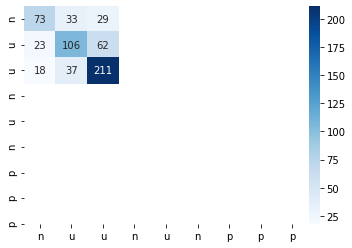

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.label.values, 
            yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Logistic Regression\n")
plt.tight_layout()
plt.show()

In [ ]:
#Generate performance metrics
print('Precision: ', precision_score(Y_test, Y_pred, average='micro'))
print('Recall: ', recall_score(Y_test, Y_pred, average='micro'))
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('F1 score: ', f1_score(Y_test, Y_pred, average='micro'))
#print('ROC-AUC score: ', roc_auc_score(Y_test, Y_pred)) # Note the difference.#
print('MCC: ', matthews_corrcoef(Y_test, Y_pred)) # Note the difference. Other measures artificially inflated by class imbalance.

Precision:  0.6587837837837838
Recall:  0.6587837837837838
Accuracy:  0.6587837837837838
F1 score:  0.6587837837837838
MCC:  0.46136284052251764


In [ ]:
print(classification_report(Y_test, Y_pred)) # y_true, y_pred

              precision    recall  f1-score   support

           0       0.64      0.54      0.59       135
           1       0.60      0.55      0.58       191
           2       0.70      0.79      0.74       266

    accuracy                           0.66       592
   macro avg       0.65      0.63      0.64       592
weighted avg       0.65      0.66      0.65       592



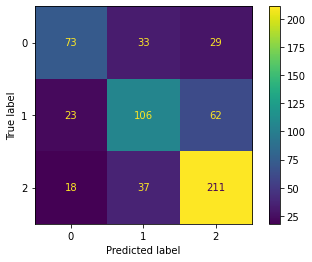

In [ ]:
cm = confusion_matrix(Y_test, Y_pred, labels=svm_model.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=svm_model.classes_).plot()